In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Q:/Business Analytics/Data Science/Price Elasticity/trainingdata edited.csv')
df.shape

(40321, 634)

In [2]:
#create dataframe using the most common upc
dfupc = df[df['upc'].isin(['17000026700'])]
dfupc.shape

(1309, 634)

In [3]:
df2=dfupc[['sevendsaleamount','sevendmovement']]
df2.shape

(1309, 2)

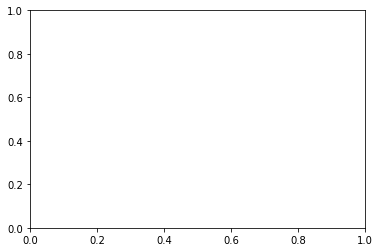

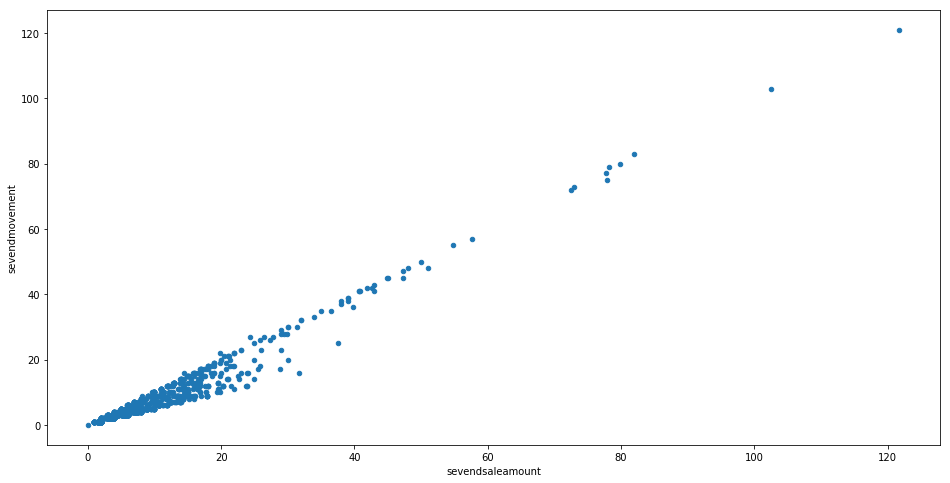

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(sharey=True)
df2.plot(kind='scatter', x='sevendsaleamount', y='sevendmovement', figsize=(16, 8))


In [20]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='sevendmovement ~ sevendsaleamount', data=df2).fit()

# print the coefficients
lm.params

Intercept          -1.730320
sevendsaleamount    0.957709
dtype: float64

In [21]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'sevendsaleamount': [df2.sevendsaleamount.min(), df2.sevendsaleamount.max()]})
X_new.head()


,sevendsaleamount
0,0.00
1,121.77


In [23]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0     -1.730320
1    114.889879
dtype: float64

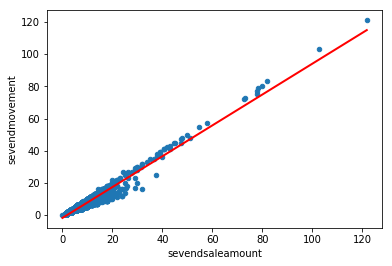

In [24]:
# first, plot the observed data
df2.plot(kind='scatter', x='sevendsaleamount', y='sevendmovement')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [25]:
lm.conf_int()

,0,1
Intercept,-1.884403,-1.576237
sevendsaleamount,0.946342,0.969075


In [26]:
lm.rsquared

0.9543463646394053

In [27]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sevendmovement   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 2.732e+04
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:56:41   Log-Likelihood:                -2817.7
No. Observations:                1309   AIC:                             5639.
Df Residuals:                    1307   BIC:                             5650.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.7303      0.079    -22.030      0.000      -1.884      -1.576
sevendsaleamount     0.9577      0.006    165.292      0.000       0.946       0.969
==============================================================================
Omnibus:                      277.678   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.732
Skew:                          -1.116   Prob(JB):                    2.31e-156
Kurtosis:                       5.857   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
pd.Series(dfupc['fyweekendingdateint']).value_counts()

20170827    31
20171008    31
20171015    31
20171029    31
20170423    30
20171224    30
20170730    29
20170910    29
20180128    29
20171231    28
20170813    28
20170507    28
20170924    28
20171022    28
20171105    28
20170521    28
20180107    27
20170716    27
20170903    27
20171119    27
20170528    27
20170806    27
20171203    26
20170604    26
20170709    26
20170917    26
20170702    26
20170409    26
20170402    26
20171126    26
20170514    25
20170625    25
20170226    25
20170326    25
20170723    25
20170312    24
20170212    24
20170820    24
20180121    24
20170416    24
20171210    24
20170618    24
20170611    24
20171112    24
20170319    23
20170430    23
20180114    23
20171217    22
20170219    21
20170205    19
Name: fyweekendingdateint, dtype: int64

In [29]:
dfupc.shape

(1309, 634)

In [31]:
dftime=dfupc[['fyweekendingdateint','sevendsaleamount','sevendmovement']]
dftime.shape

(1309, 3)

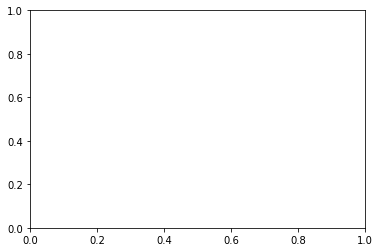

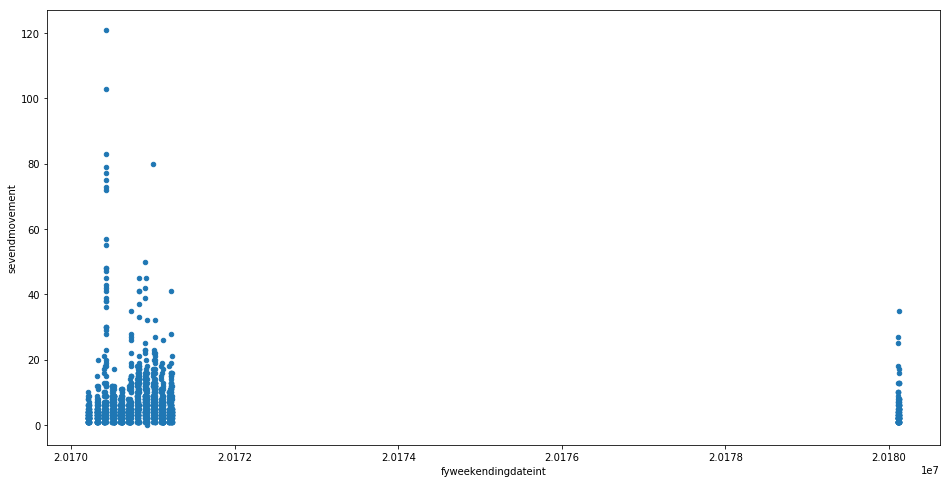

In [32]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(sharey=True)
dftime.plot(kind='scatter', x='fyweekendingdateint', y='sevendmovement', figsize=(16, 8))

In [35]:
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv im

In [37]:
import numpy as np
import pandas as pd
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import pymc3 as pm, theano.tensor as tt
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
%matplotlib inline

In [38]:
df2.describe()

,sevendsaleamount,sevendmovement
count,1309.000000,1309.000000
mean,9.214752,7.094729
std,9.946024,9.750569
min,0.000000,0.000000
25%,3.580000,2.000000
50%,6.760000,4.000000
75%,11.420000,8.000000
max,121.770000,121.000000


In [39]:
pd.Series(dfupc['mfsfilenumber']).value_counts()

1035    50
1632    49
1380    49
1241    49
1356    49
1532    48
1466    48
1148    48
1552    47
1192    46
1019    46
1165    46
1260    46
1573    44
1039    44
1439    44
1464    44
1393    44
1519    42
1415    42
1183    41
1534    39
1516    39
1056    38
1410    38
1377    36
1560    34
1136    29
7042    28
7062    27
1090    18
1216    17
Name: mfsfilenumber, dtype: int64

In [40]:
df3=dfupc[['mfsfilenumber','fyweekendingdateint','sevendsaleamount','sevendmovement']]
df3.shape

(1309, 4)

In [43]:
# create X and y
feature_cols = ['mfsfilenumber', 'fyweekendingdateint', 'sevendsaleamount']
X = df3[feature_cols]
y = df3.sevendmovement

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)


282.2084981735116
[ 1.81720913e-04 -1.40915015e-05  9.60001799e-01]


In [45]:
# create a fitted model with all three features
lm = smf.ols(formula='sevendmovement ~ mfsfilenumber + fyweekendingdateint + sevendsaleamount', data=df3).fit()

# print the coefficients
lm.params

Intercept              282.208498
mfsfilenumber            0.000182
fyweekendingdateint     -0.000014
sevendsaleamount         0.960002
dtype: float64

In [46]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sevendmovement   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     9194.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        13:50:43   Log-Likelihood:                -2810.8
No. Observations:                1309   AIC:                             5630.
Df Residuals:                    1305   BIC:                             5650.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             282.2085    455.931      0.619      0.536    -612.229    1176.646
mfsfilenumber           0.0002   4.97e-05      3.653      0.000    8.41e-05       0.000
fyweekendingdateint -1.409e-05   2.26e-05     -0.623      0.533   -5.84e-05    3.02e-05
sevendsaleamount        0.9600      0.006    165.016      0.000       0.949       0.971
==============================================================================
Omnibus:                      287.911   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              772.140
Skew:                          -1.141   Prob(JB):                    2.15e-168
Kurtosis:                       5.992   Cond. No.                     1.60e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
pd.Series(dfupc['privatelabeldescription']).value_counts()

Not Private Label    1309
Name: privatelabeldescription, dtype: int64

In [48]:
dfupc.shape

(1309, 634)

In [60]:
# create three dummy variables using get_dummies, then exclude the first dummy column
storesize_dummies = pd.get_dummies(dfupc.storesize, prefix='storesize').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
dfupc = pd.concat([dfupc, storesize_dummies], axis=1)
dfupc.shape

(1309, 637)

In [61]:
df2 = dfupc[['fyweekendingdateint','sevendmovement','sevendsaleamount','avgdiscount','mfsfilenumber','storesize','storesize_Medium','storesize_Small']]
df2.shape

(1309, 8)

In [62]:
# create a fitted model with all three features
lm = smf.ols(formula='sevendmovement ~ fyweekendingdateint + sevendsaleamount + avgdiscount + mfsfilenumber +storesize + storesize_Medium + storesize_Small', data=df2).fit()

# print the coefficients
lm.params

Intercept               354.341384
storesize[T.Medium]       0.468242
storesize[T.Small]        0.399462
storesize[T.Unknown]      1.350394
fyweekendingdateint      -0.000018
sevendsaleamount          0.966742
avgdiscount              -1.058881
mfsfilenumber             0.000123
storesize_Medium          0.468243
storesize_Small           0.399462
dtype: float64

In [63]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sevendmovement   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     4122.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        14:15:29   Log-Likelihood:                -2780.6
No. Observations:                1309   AIC:                             5577.
Df Residuals:                    1301   BIC:                             5619.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              354.3414    450.343      0.787      0.432    -529.136    1237.819
storesize[T.Medium]      0.4682      0.067      7.041      0.000       0.338       0.599
storesize[T.Small]       0.3995      0.097      4.104      0.000       0.208       0.590
storesize[T.Unknown]     1.3504      0.486      2.778      0.006       0.397       2.304
fyweekendingdateint  -1.768e-05   2.23e-05     -0.792      0.428   -6.15e-05    2.61e-05
sevendsaleamount         0.9667      0.006    167.521      0.000       0.955       0.978
avgdiscount             -1.0589      3.545     -0.299      0.765      -8.013       5.895
mfsfilenumber            0.0001   5.72e-05      2.156      0.031    1.11e-05       0.000
storesize_Medium         0.4682      0.067      7.041      0.000       0.338       0.599
storesize_Small          0.3995      0.097      4.104      0.000       0.208       0.590
==============================================================================
Omnibus:                      286.321   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.105
Skew:                          -1.134   Prob(JB):                    9.79e-168
Kurtosis:                       5.993   Cond. No.                     1.22e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.59e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
pd.Series(dfupc['actualdate']).value_counts()

10/15/2017    31
10/29/2017    31
10/8/2017     31
8/27/2017     31
12/24/2017    30
4/23/2017     30
9/10/2017     29
7/30/2017     29
1/28/2018     29
5/21/2017     28
12/31/2017    28
8/13/2017     28
5/7/2017      28
11/5/2017     28
9/24/2017     28
10/22/2017    28
5/28/2017     27
7/16/2017     27
11/19/2017    27
1/7/2018      27
8/6/2017      27
9/3/2017      27
11/26/2017    26
7/2/2017      26
12/3/2017     26
7/9/2017      26
6/4/2017      26
4/9/2017      26
4/2/2017      26
9/17/2017     26
7/23/2017     25
6/25/2017     25
3/26/2017     25
5/14/2017     25
2/26/2017     25
12/10/2017    24
6/18/2017     24
3/12/2017     24
1/21/2018     24
8/20/2017     24
4/16/2017     24
2/12/2017     24
11/12/2017    24
6/11/2017     24
3/19/2017     23
1/14/2018     23
4/30/2017     23
12/17/2017    22
2/19/2017     21
2/5/2017      19
Name: actualdate, dtype: int64

In [75]:
from datetime import datetime
s = "20170205"
# you could also import date instead of datetime and use that.
date = datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]))
print (date)
type(date)

2017-02-05 00:00:00


datetime.datetime

In [78]:
datelist = dfupc['fyweekendingdateint'].tolist()
print (datelist)

[20170205, 20170212, 20170219, 20170226, 20170312, 20170319, 20170326, 20170402, 20170409, 20170416, 20170423, 20170507, 20170514, 20170521, 20170528, 20170604, 20170611, 20170618, 20170625, 20170702, 20170709, 20170716, 20170723, 20170730, 20170806, 20170813, 20170820, 20170827, 20170903, 20170910, 20170917, 20170924, 20171008, 20171015, 20171022, 20171029, 20171105, 20171112, 20171119, 20171126, 20171203, 20171210, 20171217, 20171224, 20171231, 20180107, 20180114, 20180121, 20180128, 20170205, 20170212, 20170219, 20170226, 20170319, 20170326, 20170402, 20170409, 20170416, 20170423, 20170430, 20170507, 20170514, 20170521, 20170528, 20170604, 20170618, 20170625, 20170702, 20170709, 20170716, 20170723, 20170730, 20170806, 20170813, 20170820, 20170827, 20170903, 20170910, 20170917, 20170924, 20171008, 20171015, 20171022, 20171029, 20171105, 20171112, 20171126, 20171210, 20171217, 20171224, 20171231, 20180121, 20180128, 20170205, 20170212, 20170219, 20170226, 20170312, 20170319, 20170326,

In [83]:
datelist2 = []
from datetime import datetime
for num in range (0,len(datelist)):
    datelist2.append (datetime(year=int(str(datelist[num])[0:4]), month=int(str(datelist[num])[4:6]), day=int(str(datelist[num])[6:8])))
print (datelist2)
    

[datetime.datetime(2017, 2, 5, 0, 0), datetime.datetime(2017, 2, 12, 0, 0), datetime.datetime(2017, 2, 19, 0, 0), datetime.datetime(2017, 2, 26, 0, 0), datetime.datetime(2017, 3, 12, 0, 0), datetime.datetime(2017, 3, 19, 0, 0), datetime.datetime(2017, 3, 26, 0, 0), datetime.datetime(2017, 4, 2, 0, 0), datetime.datetime(2017, 4, 9, 0, 0), datetime.datetime(2017, 4, 16, 0, 0), datetime.datetime(2017, 4, 23, 0, 0), datetime.datetime(2017, 5, 7, 0, 0), datetime.datetime(2017, 5, 14, 0, 0), datetime.datetime(2017, 5, 21, 0, 0), datetime.datetime(2017, 5, 28, 0, 0), datetime.datetime(2017, 6, 4, 0, 0), datetime.datetime(2017, 6, 11, 0, 0), datetime.datetime(2017, 6, 18, 0, 0), datetime.datetime(2017, 6, 25, 0, 0), datetime.datetime(2017, 7, 2, 0, 0), datetime.datetime(2017, 7, 9, 0, 0), datetime.datetime(2017, 7, 16, 0, 0), datetime.datetime(2017, 7, 23, 0, 0), datetime.datetime(2017, 7, 30, 0, 0), datetime.datetime(2017, 8, 6, 0, 0), datetime.datetime(2017, 8, 13, 0, 0), datetime.datetime(2

In [86]:
dfupc['datelist2']=datelist2
dfupc.shape

(1309, 638)